## Business Intelligence 🔎

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


In [2]:
# Load the CSV and display data
df = pd.read_csv("data/youth_smoking_drug_data_10000_rows_expanded.csv")

print(df.shape)
print(df.columns)
print(df.dtypes)


(10000, 15)
Index(['Year', 'Age_Group', 'Gender', 'Smoking_Prevalence',
       'Drug_Experimentation', 'Socioeconomic_Status', 'Peer_Influence',
       'School_Programs', 'Family_Background', 'Mental_Health',
       'Access_to_Counseling', 'Parental_Supervision', 'Substance_Education',
       'Community_Support', 'Media_Influence'],
      dtype='object')
Year                      int64
Age_Group                object
Gender                   object
Smoking_Prevalence      float64
Drug_Experimentation    float64
Socioeconomic_Status     object
Peer_Influence            int64
School_Programs          object
Family_Background         int64
Mental_Health             int64
Access_to_Counseling     object
Parental_Supervision      int64
Substance_Education      object
Community_Support         int64
Media_Influence           int64
dtype: object


In [3]:
# Missing values handling
print(df.shape)
print(df.info())
print(f'\n Before filling missing values')
print(df.isna().sum())
df = df.dropna()
print(f'\n After filling missing values')
print(f'\n')


(10000, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  10000 non-null  int64  
 1   Age_Group             10000 non-null  object 
 2   Gender                10000 non-null  object 
 3   Smoking_Prevalence    10000 non-null  float64
 4   Drug_Experimentation  10000 non-null  float64
 5   Socioeconomic_Status  10000 non-null  object 
 6   Peer_Influence        10000 non-null  int64  
 7   School_Programs       10000 non-null  object 
 8   Family_Background     10000 non-null  int64  
 9   Mental_Health         10000 non-null  int64  
 10  Access_to_Counseling  10000 non-null  object 
 11  Parental_Supervision  10000 non-null  int64  
 12  Substance_Education   10000 non-null  object 
 13  Community_Support     10000 non-null  int64  
 14  Media_Influence       10000 non-null  int64  
dtypes: float

In [4]:
#Searching for outliers
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"Unique values in column '{col}':")
    print(df[col].unique())
    print()

numerical_columns = df.select_dtypes(include='number').columns.drop(['Smoking_Prevalence', 'Drug_Experimentation'])
for col in numerical_columns:
    print(f"Unique values in column '{col}':")
    print(df[col].unique())
    print()

exam_outliers = df[df['Smoking_Prevalence'] < 0] #1525 row > 100
drug_outliers = df[df['Drug_Experimentation'] < 0] # No rows for more than 100 or less than 0

Unique values in column 'Age_Group':
['15-19' '10-14' '40-49' '70-79' '30-39' '60-69' '50-59' '25-29' '80+'
 '20-24']

Unique values in column 'Gender':
['Both' 'Female' 'Male']

Unique values in column 'Socioeconomic_Status':
['High' 'Middle' 'Low']

Unique values in column 'School_Programs':
['Yes' 'No']

Unique values in column 'Access_to_Counseling':
['No' 'Yes']

Unique values in column 'Substance_Education':
['No' 'Yes']

Unique values in column 'Year':
[2024 2023 2022 2021 2020]

Unique values in column 'Peer_Influence':
[ 5  6 10  1  4  9  2  8  3  7]

Unique values in column 'Family_Background':
[ 1 10  2  9  7  3  5  8  4  6]

Unique values in column 'Mental_Health':
[ 5  7  4  1  2  6  3 10  9  8]

Unique values in column 'Parental_Supervision':
[ 4  9  2  5 10  1  8  7  6  3]

Unique values in column 'Community_Support':
[ 3  9  5 10  4  2  1  8  6  7]

Unique values in column 'Media_Influence':
[ 1  3  9  2 10  6  4  8  7  5]


In [5]:
# Changing data types from object to category type
# Adding mental resistance factor, based on mental health and peer influence
df['Age_Group'] = df['Age_Group'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Socioeconomic_Status'] = df['Socioeconomic_Status'].astype('category')
df['School_Programs'] = df['School_Programs'].astype('category')
df['Access_to_Counseling'] = df['Access_to_Counseling'].astype('category')
df['Substance_Education'] = df['Substance_Education'].astype('category')
df['Mental_Resistance_Factor'] = (df['Mental_Health'] * df['Peer_Influence'])

In [16]:
# Bulding model, that predicts drug_experimentation from 0-1, using all features
# Necessary pre-data processing steps

X = df[['Year', 'Age_Group', 'Gender', 'Smoking_Prevalence', 'Socioeconomic_Status',
        'Peer_Influence', 'School_Programs', 'Family_Background', 'Mental_Health',
        'Access_to_Counseling', 'Parental_Supervision', 'Substance_Education',
        'Community_Support', 'Media_Influence']]


threshold = 40 # more than > threshold group is considered as high-risk for drug experimentation
y = (df['Drug_Experimentation'] > threshold).astype(int)  # 1 = high risk, 0 = low risk

le = LabelEncoder()
X.loc[:, 'Age_Group'] = le.fit_transform(X['Age_Group'])
X.loc[:, 'Gender'] = le.fit_transform(X['Gender'])
X.loc[:, 'Socioeconomic_Status'] = le.fit_transform(X['Socioeconomic_Status'])
X.loc[:, 'School_Programs'] = le.fit_transform(X['School_Programs'])
X.loc[:, 'Family_Background'] = le.fit_transform(X['Family_Background'])
X.loc[:, 'Mental_Health'] = le.fit_transform(X['Mental_Health'])
X.loc[:, 'Access_to_Counseling'] = le.fit_transform(X['Access_to_Counseling'])
X.loc[:, 'Parental_Supervision'] = le.fit_transform(X['Parental_Supervision'])
X.loc[:, 'Substance_Education'] = le.fit_transform(X['Substance_Education'])
X.loc[:, 'Community_Support'] = le.fit_transform(X['Community_Support'])
X.loc[:, 'Media_Influence'] = le.fit_transform(X['Media_Influence'])


In [17]:
# Train - Validaton - Test splits
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [18]:
# Train and build model
# Best parameters were found by Bayesian optimization, these are best params for predicting Drug_experimentation
rf_model = RandomForestClassifier(n_estimators=845, max_depth=7, max_features='log2', random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features='log2', n_estimators=845,
                       random_state=42)

In [19]:
# Model predictions
y_val_pred = rf_model.predict(X_val)

y_test_pred = rf_model.predict(X_test)

In [20]:
# Accuracy and confusion matrix for validation and test datasets comparing with predicted values
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy_val * 100:.2f}%')

accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {accuracy_test * 100:.2f}%')

print('\nClassification Report (Validation Set):')
print(classification_report(y_val, y_val_pred))

print('\nClassification Report (Test Set):')
print(classification_report(y_test, y_test_pred))

Validation Accuracy: 47.20%
Test Accuracy: 50.80%

Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.49      0.38      0.43       777
           1       0.46      0.57      0.51       723

    accuracy                           0.47      1500
   macro avg       0.47      0.48      0.47      1500
weighted avg       0.47      0.47      0.47      1500


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.51      0.38      0.43      1248
           1       0.51      0.64      0.57      1252

    accuracy                           0.51      2500
   macro avg       0.51      0.51      0.50      2500
weighted avg       0.51      0.51      0.50      2500


In [11]:
# Concat train,validation dataset and re-training model with identical parameters
X_train_full = np.concatenate([X_train, X_val], axis=0)
y_train_full = np.concatenate([y_train, y_val], axis=0)

rf_model.fit(X_train_full, y_train_full)

y_test_pred_full = rf_model.predict(X_test)

accuracy_test_full = accuracy_score(y_test, y_test_pred_full)
print(f'Re-trained model Test Accuracy: {accuracy_test_full * 100:.2f}%')

print('\nClassification Report (Test Set after Retraining):')
print(classification_report(y_test, y_test_pred_full))


Re-trained model Test Accuracy: 82.08%

Classification Report (Test Set after Retraining):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       448
           1       0.82      1.00      0.90      2052

    accuracy                           0.82      2500
   macro avg       0.41      0.50      0.45      2500
weighted avg       0.67      0.82      0.74      2500


C:\Users\42191\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\42191\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\42191\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\42191\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classific

In [12]:
# Same thing can be applied for Smoking_Prevalence
# Best parameters found with bayesian optimatization were with threshold set to 20:
# n_estimators': 895, 'max_depth': 9, 'max_features': 'sqrt'

X = df[['Year', 'Age_Group', 'Gender', 'Smoking_Prevalence', 'Socioeconomic_Status',
        'Peer_Influence', 'School_Programs', 'Family_Background', 'Mental_Health',
        'Access_to_Counseling', 'Parental_Supervision', 'Substance_Education',
        'Community_Support', 'Media_Influence']]
#Drug_Experimentation
threshold = 30 # more than > threshold group is considered as high-risk for drug experimentation
y = (df['Drug_Experimentation'] > threshold).astype(int)  # 1 = high risk, 0 = low risk

le = LabelEncoder()
X.loc[:, 'Age_Group'] = le.fit_transform(X['Age_Group'])
X.loc[:, 'Gender'] = le.fit_transform(X['Gender'])
X.loc[:, 'Socioeconomic_Status'] = le.fit_transform(X['Socioeconomic_Status'])
X.loc[:, 'School_Programs'] = le.fit_transform(X['School_Programs'])
X.loc[:, 'Family_Background'] = le.fit_transform(X['Family_Background'])
X.loc[:, 'Mental_Health'] = le.fit_transform(X['Mental_Health'])
X.loc[:, 'Access_to_Counseling'] = le.fit_transform(X['Access_to_Counseling'])
X.loc[:, 'Parental_Supervision'] = le.fit_transform(X['Parental_Supervision'])
X.loc[:, 'Substance_Education'] = le.fit_transform(X['Substance_Education'])
X.loc[:, 'Community_Support'] = le.fit_transform(X['Community_Support'])
X.loc[:, 'Media_Influence'] = le.fit_transform(X['Media_Influence'])

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=895, max_depth=9, max_features='sqrt', random_state=42)
rf_model.fit(X_train, y_train)

y_val_pred = rf_model.predict(X_val)

y_test_pred = rf_model.predict(X_test)

accuracy_val = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy_val * 100:.2f}%')

accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {accuracy_test * 100:.2f}%')

print('\nClassification Report (Validation Set):')
print(classification_report(y_val, y_val_pred))

print('\nClassification Report (Test Set):')
print(classification_report(y_test, y_test_pred))


Validation Accuracy: 65.40%
Test Accuracy: 66.96%

Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       519
           1       0.65      1.00      0.79       981

    accuracy                           0.65      1500
   macro avg       0.33      0.50      0.40      1500
weighted avg       0.43      0.65      0.52      1500


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       826
           1       0.67      1.00      0.80      1674

    accuracy                           0.67      2500
   macro avg       0.33      0.50      0.40      2500
weighted avg       0.45      0.67      0.54      2500


C:\Users\42191\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\42191\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\42191\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Optimal Threshold (Minimized False Positives): inf
Validation Accuracy with Optimal Threshold: 34.60%
Test Accuracy with Optimal Threshold: 33.04%
ROC AUC Score: 0.51


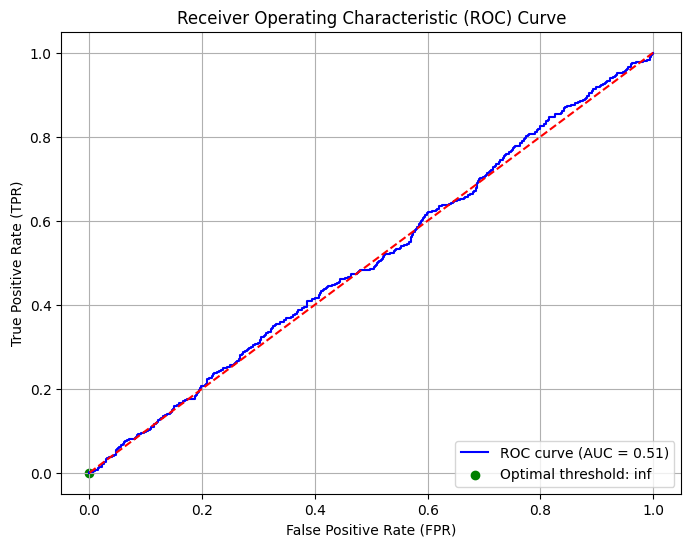


Classification Report (Validation Set) with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.35      1.00      0.51       519
           1       0.00      0.00      0.00       981

    accuracy                           0.35      1500
   macro avg       0.17      0.50      0.26      1500
weighted avg       0.12      0.35      0.18      1500


Classification Report (Test Set) with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50       826
           1       0.00      0.00      0.00      1674

    accuracy                           0.33      2500
   macro avg       0.17      0.50      0.25      2500
weighted avg       0.11      0.33      0.16      2500


C:\Users\42191\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\42191\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\42191\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [13]:
# finding optimal threshold using ROC
y_val_proba = rf_model.predict_proba(X_val)[:, 1]  # Probabilities for the positive class
y_test_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)

# Find threshold with minimal false positive rate
min_fpr_index = fpr.argmin()  # Index where FPR is minimal
optimal_threshold = thresholds[min_fpr_index]

# Print the optimal threshold
print(f'Optimal Threshold (Minimized False Positives): {optimal_threshold}')

# Get predictions with optimal threshold
y_val_optimal_pred = (y_val_proba >= optimal_threshold).astype(int)
y_test_optimal_pred = (y_test_proba >= optimal_threshold).astype(int)

# Evaluate accuracy with optimal threshold
accuracy_val_optimal = accuracy_score(y_val, y_val_optimal_pred)
print(f'Validation Accuracy with Optimal Threshold: {accuracy_val_optimal * 100:.2f}%')

accuracy_test_optimal = accuracy_score(y_test, y_test_optimal_pred)
print(f'Test Accuracy with Optimal Threshold: {accuracy_test_optimal * 100:.2f}%')

# ROC AUC score for reference
roc_auc = roc_auc_score(y_val, y_val_proba)
print(f'ROC AUC Score: {roc_auc:.2f}')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random classifier line
plt.scatter(fpr[min_fpr_index], tpr[min_fpr_index], color='green', label=f'Optimal threshold: {optimal_threshold:.2f}')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print the Classification Report with optimal threshold
print('\nClassification Report (Validation Set) with Optimal Threshold:')
print(classification_report(y_val, y_val_optimal_pred))

print('\nClassification Report (Test Set) with Optimal Threshold:')
print(classification_report(y_test, y_test_optimal_pred))

In [14]:
# Concat test,validation dataset and perform model training 
X_train_full = np.concatenate([X_train, X_val], axis=0)
y_train_full = np.concatenate([y_train, y_val], axis=0)

rf_model.fit(X_train_full, y_train_full)

y_test_pred_full = rf_model.predict(X_test)

accuracy_test_full = accuracy_score(y_test, y_test_pred_full)
print(f'Re-trained model Test Accuracy: {accuracy_test_full * 100:.2f}%')

print('\nClassification Report (Test Set after Retraining):')
print(classification_report(y_test, y_test_pred_full))

C:\Users\42191\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Re-trained model Test Accuracy: 66.96%

Classification Report (Test Set after Retraining):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       826
           1       0.67      1.00      0.80      1674

    accuracy                           0.67      2500
   macro avg       0.33      0.50      0.40      2500
weighted avg       0.45      0.67      0.54      2500


C:\Users\42191\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\42191\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\42191\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [15]:
# using random classifier, for baseline performance

random_model = DummyClassifier(strategy='uniform', random_state=42)

# Train the model
random_model.fit(X_train, y_train)

# Predictions
y_random_pred = random_model.predict(X_test)

# Evaluate the performance
print("Accuracy of Random Classifier:", accuracy_score(y_test, y_random_pred))
print("\nClassification Report (Random Classifier):")
print(classification_report(y_test, y_random_pred))

Accuracy of Random Classifier: 0.4984

Classification Report (Random Classifier):
              precision    recall  f1-score   support

           0       0.33      0.51      0.40       826
           1       0.67      0.49      0.57      1674

    accuracy                           0.50      2500
   macro avg       0.50      0.50      0.49      2500
weighted avg       0.56      0.50      0.51      2500
